## Web Scraping 

In [29]:
import requests
from bs4 import BeautifulSoup
import smtplib

In [2]:
URL="https://www.amazon.in/Maps-Meaning-Architecture-Jordan-Peterson/dp/0415922224/ref=sr_1_2?crid=PS2TE39XF3IC&keywords=jordan+peterson&qid=1580918397&sprefix=jordan+%2Caps%2C-1&sr=8-2"

In [3]:
headers={"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36"   
}

page=requests.get(URL,headers=headers)

In [7]:
soup=BeautifulSoup(page.content,"html.parser")

'<!DOCTYPE doctype html>\n<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in">\n <!-- sp:feature:head-start -->\n <head>\n  <script>\n   var aPageStart = (new Date()).getTime();\n  </script>\n  <meta charset="utf-8"/>\n  <script type="text/javascript">\n   var ue_t0=ue_t0||+new Date();\n  </script>\n  <!-- sp:feature:cs-optimization -->\n  <meta content="on" http-equiv="x-dns-prefetch-control"/>\n  <link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>\n  <link href="https://m.media-amazon.com" rel="dns-prefetch"/>\n  <link href="https://completion.amazon.com" rel="dns-prefetch"/>\n  <script type="text/javascript">\n   window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),
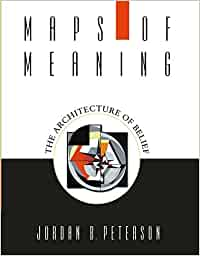

In [9]:
soup.prettify()

In [12]:
title=soup.find(id="productTitle").get_text()

In [13]:
title

'Maps of Meaning: The Architecture of Belief'

In [21]:
price=soup.find("span", {"class": "price3P"}).get_text()

In [28]:
converted_price=float(price[2:])

In [45]:
def check_price():
    page=requests.get(URL,headers=headers)
    soup=BeautifulSoup(page.content,"html.parser")    
    title=soup.find(id="productTitle").get_text()
    price=soup.find("span", {"class": "price3P"}).get_text()
    converted_price=float(price[2:])
    
    print(title,price)
    if converted_price < 800:
        send_mail()
        
def send_mail():
    server=smtplib.SMTP("smtp.gmail.com",587)
    server.ehlo()
    server.starttls()
    server.ehlo()
    server.login("govindsformal@gmail.com","qmdaphslwltsnnxa")
    
    subject="Price is low!!"
    
    body=" Check the amazon link :https://www.amazon.in/Maps-Meaning-Architecture-Jordan-Peterson/dp/0415922224/ref=sr_1_2?crid=PS2TE39XF3IC&keywords=jordan+peterson&qid=1580918397&sprefix=jordan+%2Caps%2C-1&sr=8-2"
    
    msg=f"Subject:{subject}\n\n{body}"
    
    server.sendmail(
        "govindsformal@gmail.com",
        "govindsajfb@gmail.com",
        msg
    )
    print("Email is send")
    
    server.quit()
    

In [46]:
check_price()

Maps of Meaning: The Architecture of Belief ₹ 765.00
Email is send
